In [41]:
import pandas as pd
import numpy as np

boxrec_data = pd.read_csv('boxrec_tables.csv')
df = pd.DataFrame(boxrec_data)

stance - missing = 82/793 - pct missing = 10.34%    
height - missing = 98/793 - pct missing = 12.36%    
reach - missing = 380/793 - pct missing = 47.92%    
birth place - missing = 79/793 - pct missing = 9.96%

age - missing = 19/793 - pct missing = 2.4%

In [42]:
df.replace(to_replace='None', value=np.nan, regex=True, inplace=True)

df.insert(3, 'div index', '')

div_list = ['heavy', 'cruiser', 'lightheavy', 'supermiddle', 'middle', 'superwelter', 'welter', 'superlight', 'light', 'feather', 'superbantam', 'bantam', 'superfly', 'fly', 'lightfly', 'minimum']

x = 0
for value in df['division']:
    df.at[x, 'div index'] = div_list.index(value)
    x += 1

In [43]:
ds = df.sort_values(by=['div index', 'division rating'], ascending=True)
# Can see age/height/reach need to be turned to float64s
cols_to_convert = ['age', 'height', 'reach']

for col in cols_to_convert:
    ds[col] = ds[col].astype(float)

In [44]:
dropped_missing_height_ds = ds.dropna(subset=['height'])
#Dropping missing height values gives 695 rows 
dropped_age_ds = dropped_missing_height_ds.dropna(subset=['age'])
#Dropping the missing age values from the new dataframe leaves 688 rows of data.
new_ds = dropped_age_ds

In [45]:
def replace_nan_with_mean(dataframe, column, grouping_column):
    dataframe[column] = dataframe.groupby(grouping_column)[column].transform(lambda x: x.fillna(round(x.mean(), 2)))

In [ ]:
diff_reach = new_ds.reach - new_ds.height
new_ds.insert(12, 'diff reach', diff_reach)

replace_nan_with_mean(new_ds, 'diff reach', 'division')

In [47]:
new_ds.reach.isnull().sum()

279

In [ ]:
new_list = new_ds.reach.isnull().index
reach_min = new_ds.reach.min()

for x in new_list:
    if new_ds.reach[x] >= reach_min:
        pass
    else:
        new_ds.reach[x] = new_ds.height[x] + new_ds['diff reach'][x]

In [49]:
import matplotlib.pyplot as plt

In [ ]:
new_ds.plot.scatter(x='height', y='reach', c='div index', colormap='viridis')

clear relationship between the division and the height/reach of a boxer - the heavier the division, the greater the fighter's length or reach. there are some obvious outliers in the data too.

In [50]:
average_by_division = new_ds.groupby(['div index']).mean(numeric_only=True).round(2)
average_everything_numeric = new_ds.mean(numeric_only=True).round(2)

average_by_division

,division rating,bouts,rounds,KOs,age,height,reach,diff reach,wins,losses,draws,KO wins,KO losses
div index,,,,,,,,,,,,,
0,26.36,23.47,111.19,69.30,33.21,193.04,199.01,5.97,21.28,1.77,0.28,15.81,0.85
1,24.00,24.64,129.90,62.04,32.79,187.05,192.78,5.73,21.98,2.31,0.29,14.88,0.88
2,24.47,21.51,110.98,58.31,31.42,184.86,187.39,2.53,19.47,1.77,0.26,12.44,0.93
3,25.29,24.54,136.42,58.51,30.40,182.38,185.64,3.26,21.69,2.27,0.52,13.90,0.73
4,24.60,24.35,130.56,58.92,30.81,181.05,184.65,3.60,21.95,1.79,0.56,14.21,0.72
5,25.92,25.96,150.67,55.39,30.52,177.81,181.42,3.61,23.06,2.27,0.56,13.94,0.71
6,25.12,22.29,122.04,55.35,30.69,177.23,180.50,3.27,20.25,1.54,0.40,12.25,0.52
7,24.76,23.35,123.43,59.41,29.52,175.43,178.66,3.22,21.50,1.50,0.28,13.61,0.33
8,24.41,26.17,155.20,55.07,29.80,172.30,174.67,2.37,23.70,1.91,0.43,13.91,0.70


In [ ]:
plt.figure(figsize=(16, 8), dpi=120)

for x in average_by_division:
    plt.plot(average_by_division[x], label=x)

plt.title('Average of column values by Division')
plt.xlabel('div index - 0=heavyweight, 15=minimumweight')
plt.ylabel('Average value')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

width = 16
height = 8
fig.set_size_inches(width, height)
ax.plot(average_by_division['height'], label='height')
ax.plot(average_by_division['KOs'], label='KOs')
ax.plot(average_by_division['rounds'], label='rounds')
ax.plot(average_by_division['reach'], label='reach')

ax2 = ax.twinx()
ax2.plot(average_by_division['age'], label='age', color='black')
ax2.set_ylabel('Age')
ax.legend()
ax.set_xticks(np.arange(0, 16, 1))
ax.set_title('Average of column values by Division')
ax.set_xlabel('div index - 0=heavyweight, 15=minimumweight')
ax.set_ylabel('Average value')

In [ ]:
new_ds['reach'].hist(bins=20, alpha=0.5, legend=True)
new_ds['height'].hist(bins=20, alpha=0.5, legend=True)

In [ ]:
new_ds['age'].hist(bins=20, legend=True)

In [ ]:
#CLEANING REMAINING NULL VALUES
column_list = new_ds.columns

for x in column_list:
    if new_ds[x].isnull().sum() != 0:
        print(f'{x} null values: {new_ds[x].isnull().sum()}')
        # stance null values: 26
        # birth place null values: 28

stance_null = new_ds['stance'].isnull().index
birth_null = new_ds['birth place'].isnull().index
#7 birthplace nulls have no stance value, as there is no overlap and this isn't something that can be imputed, we are removing all nulls.

In [52]:
# removing stance and birthplace null values... will first remove stance nulls as they are more important, and then remove birth place nulls.
dropping_stance_ds = new_ds.dropna(subset=['stance'])
clean_ds = dropping_stance_ds.dropna(subset=['birth place'])
# running null check
for x in column_list:
    if clean_ds[x].isnull().sum() != 0:
        print(f'{x} null values: {clean_ds[x].isnull().sum()}')

In [ ]:
from datetime import datetime

dates = clean_ds.debut.index
for x in dates:
    clean_ds.debut[x] = datetime.strptime(clean_ds.debut[x], '%d/%m/%Y').date()

clean_ds.debut = pd.to_datetime(clean_ds.debut)

In [54]:
clean_ds.dtypes

name                       object
division rating             int64
division                   object
div index                  object
bouts                       int64
rounds                      int64
KOs                       float64
debut              datetime64[ns]
age                       float64
stance                     object
height                    float64
reach                     float64
diff reach                float64
residence                  object
birth place                object
wins                        int64
losses                      int64
draws                       int64
KO wins                     int64
KO losses                   int64
dtype: object

In [55]:
end_date = pd.to_datetime('2022/12/06')
days_active = end_date - clean_ds.debut


In [56]:
clean_ds.insert(8, 'days active', days_active)

In [ ]:
#drop name + one hot encode 'stance'
preproc_ds = clean_ds

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#perform label encoding on 'team' column
preproc_ds.stance= label_encoder.fit_transform(preproc_ds.stance)


In [ ]:
preproc_ds = preproc_ds.drop('name', axis=1)
preproc_ds = preproc_ds.drop('division', axis=1)
preproc_ds = preproc_ds.drop('diff reach', axis=1)
preproc_ds = preproc_ds.drop('residence', axis=1)
preproc_ds = preproc_ds.drop('birth place', axis=1)
preproc_ds = preproc_ds.drop('debut', axis=1)
preproc_ds['div index'] = preproc_ds['div index'].astype(int)

In [94]:
preproc_ds['days active'] = preproc_ds['days active'].astype(str)
preproc_ds['days active'] = preproc_ds['days active'].map(lambda x: x.rstrip(' days'))
preproc_ds['days active'] = preproc_ds['days active'].astype(int)

In [112]:
preproc_ds.dtypes

division rating      int64
div index            int32
bouts                int64
rounds               int64
KOs                float64
days active          int32
age                float64
stance               int32
height             float64
reach              float64
wins                 int64
losses               int64
draws                int64
KO wins              int64
KO losses            int64
dtype: object

In [114]:
four_ds = preproc_ds[['height', 'reach', 'age', 'stance']]

In [115]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(four_ds)

# Explore the results of the clustering algorithm
kmeans.cluster_centers_

array([[172.27317073, 175.22658537,  29.13170732,   0.31219512],
       [181.88888889, 185.53606061,  31.71212121,   0.22727273],
       [162.52095808, 165.09023952,  28.64670659,   0.28742515],
       [193.08695652, 199.93376812,  31.27536232,   0.23188406]])

In [116]:
import seaborn as sns; sns.set()

y_kmeans = kmeans.predict(four_ds)

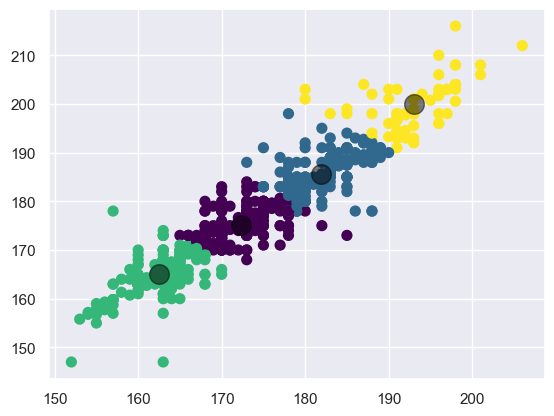

In [117]:
plt.scatter(four_ds.iloc[:, 0], four_ds.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [119]:
print(kmeans.labels_)

[3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 3
 3 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1 3 1 1 1 3 1 3 3 1 1 1 3 3 3 1 3 1 1 3 1 1
 3 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 3 1 1 1 1 1 1 1 3 1 1 1 3 0 1 1 1 3 1 1 1 1 1 0 0 1 1 1 3 1 1 0 0 1 1 3
 1 1 1 1 3 1 1 1 1 0 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 0 1 1 1 1 1 1 1 1 3 0
 1 1 3 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 3 0 0 0 0 0 0 1 0 1 1 2
 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 3 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 0 0 0 0 1 0 1 1 2 0 0 0 2 2 2 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0 2 0 0 1 0 0 0 1 0 0 0 0 1 0 0 2 0 0 2 0 0 0 2 2 2 0 0 2 0 2 0 0 1
 2 0 0 0 0 2 0 0 0 0 1 1 0 0 2 0 0 0 0 2 0 0 2 0 2 0 0 2 0 1 1 2 0 2 0 0 0
 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 2 0 2 0 2 0 0 0 0 2
 2 0 2 2 2 2 2 2 2 2 2 2 